# Spotify Data Analysis 

Hello my name is Paola Hernandez and I chose to analyze the spotify data. 

In [160]:
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import preprocessing
%matplotlib inline

## Import the spotify data, and display it

In [161]:
import pandas
pandas.options.display.max_columns = None
pandas.options.display.max_rows = None

spotify_data = pandas.read_csv('spotify_artist_data.csv')
spotify_data


,Unnamed: 0,Artist Name,Lead Streams,Feats,Tracks,One Billion,100 Million,Last Updated
0,1,Drake,"50,162,292,808","19,246,513,666",262,6,130,19.09.22
1,2,Bad Bunny,"44,369,032,140","5,391,990,975",163,5,118,20.09.22
2,3,Ed Sheeran,"38,153,682,361","2,791,278,201",240,10,62,19.09.22
3,4,The Weeknd,"34,767,779,741","4,288,903,657",186,8,72,19.09.22
4,5,Taylor Swift,"32,596,728,109","424,053,296",323,1,96,20.09.22
5,6,Justin Bieber,"32,465,998,885","10,816,202,075",225,6,58,20.09.22
6,7,Ariana Grande,"32,287,682,040","2,052,297,828",181,8,71,19.09.22
7,8,Eminem,"30,431,861,291","4,165,031,640",301,5,65,19.09.22
8,9,Post Malone,"29,832,277,109","2,728,018,288",98,9,57,19.09.22
9,10,BTS,"28,533,458,128","323,205,288",262,1,98,19.09.22


## Describe the data

In [162]:
spotify_description = spotify_data.describe()
spotify_description

,Unnamed: 0
count,1009.000000
mean,505.000000
std,291.417513
min,1.000000
25%,253.000000
50%,505.000000
75%,757.000000
max,1009.000000


## Who is the most streamed artist on spotify?

In [163]:
#who is the highest streamed spotify artist?
highest_artist = spotify_data.iloc[0,1]
print("The artist with the most streams was " + highest_artist)

The artist with the most streams was Drake


## Top 5 artist, with lead streams

In [164]:
tops = spotify_data.head()
tops

,Unnamed: 0,Artist Name,Lead Streams,Feats,Tracks,One Billion,100 Million,Last Updated
0,1,Drake,"50,162,292,808","19,246,513,666",262,6,130,19.09.22
1,2,Bad Bunny,"44,369,032,140","5,391,990,975",163,5,118,20.09.22
2,3,Ed Sheeran,"38,153,682,361","2,791,278,201",240,10,62,19.09.22
3,4,The Weeknd,"34,767,779,741","4,288,903,657",186,8,72,19.09.22
4,5,Taylor Swift,"32,596,728,109","424,053,296",323,1,96,20.09.22


## Who were the top 5 artists?

In [165]:
top_5_artists = spotify_data.groupby('Artist Name').agg({
    'Unnamed: 0': 'sum'
}).sort_values('Unnamed: 0', ascending=True)[:5]

top_5_artists

,Unnamed: 0
Artist Name,
Drake,1
Bad Bunny,2
Ed Sheeran,3
The Weeknd,4
Taylor Swift,5


## What is a visual representation of the top 5 artists?

<AxesSubplot:xlabel='Artist Name', ylabel='Unnamed: 0'>

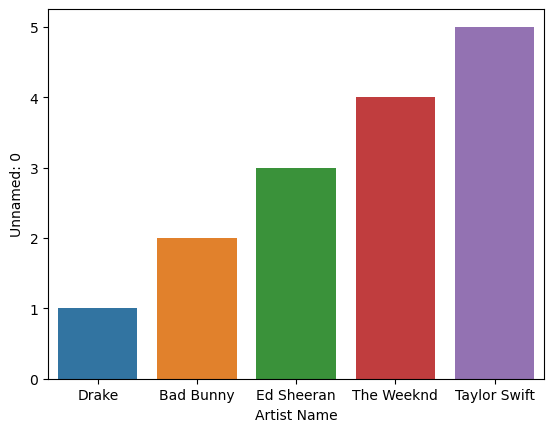

In [166]:
sns.barplot(
    y='Unnamed: 0',
    x='Artist Name',
    data=top_5_artists.reset_index(),
)

## What is the relationship between the artist rank and tracks?

<AxesSubplot:xlabel='Unnamed: 0', ylabel='Tracks'>

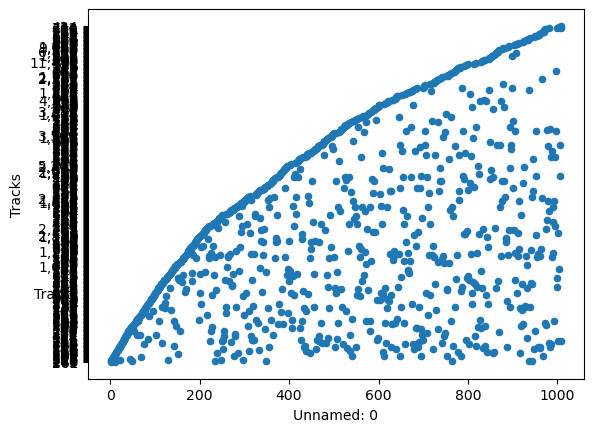

In [167]:
spotify_data.plot(x='Unnamed: 0', y='Tracks', kind ='scatter')

## What is the relationship between Tracks and 100 Million?

<AxesSubplot:xlabel='Tracks', ylabel='100 Million'>

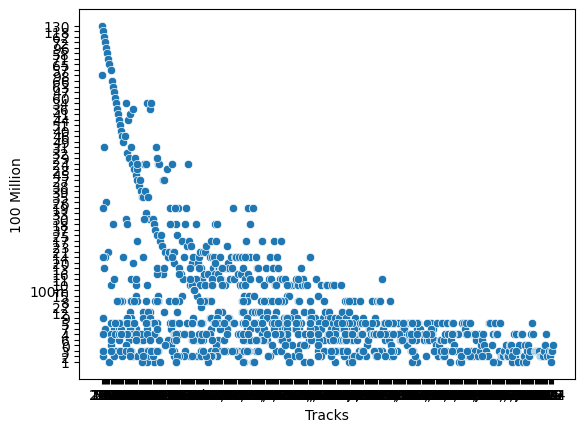

In [168]:
sns.scatterplot(x='Tracks', y='100 Million', data=spotify_data)